<a href="https://colab.research.google.com/github/Flowergift/Python_AI_Sample/blob/main/142_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 1s 0us/step
x_train:(60000, 28, 28) y_train:(60000,) x_test:(10000, 28, 28) y_test:(10000,) 


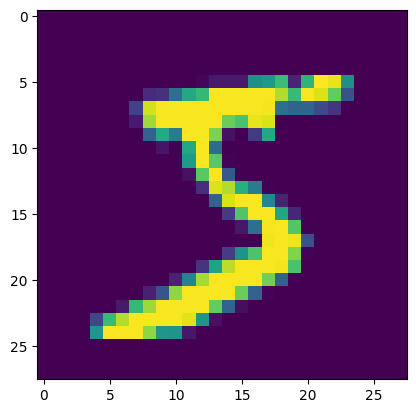

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

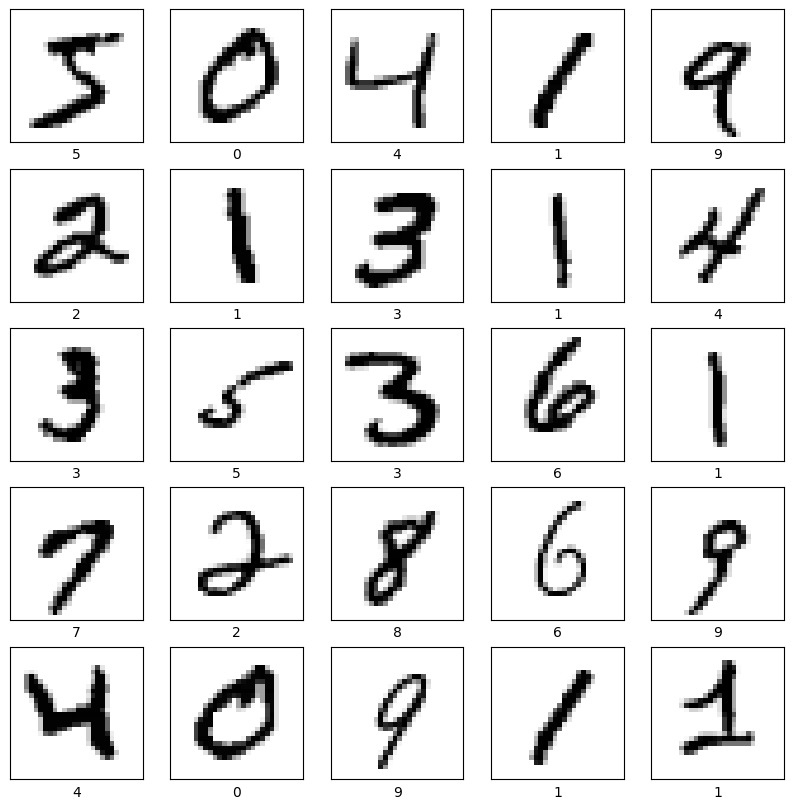

Epoch 1/5
1875/1875 [==============================] - 19s 8ms/step - loss: 0.2613 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1168 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0814 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0612 - accuracy: 0.9813
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
p_test[0] :  [2.3849448e-06 2.2097408e-08 7.3000083e-05 1.0700387e-04 5.9201768e-11
 5.7989763e-07 3.8447557e-12 9.9980760e-01 5.5181949e-06 3.9465394e-06]
p_test[0]: 7 y_test[0]: 7


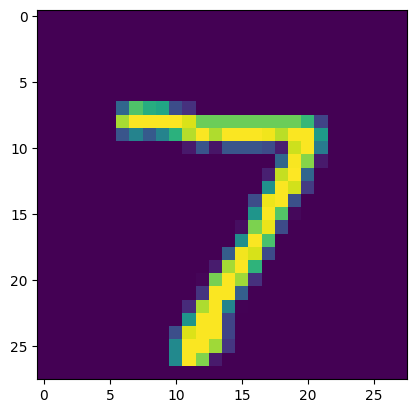

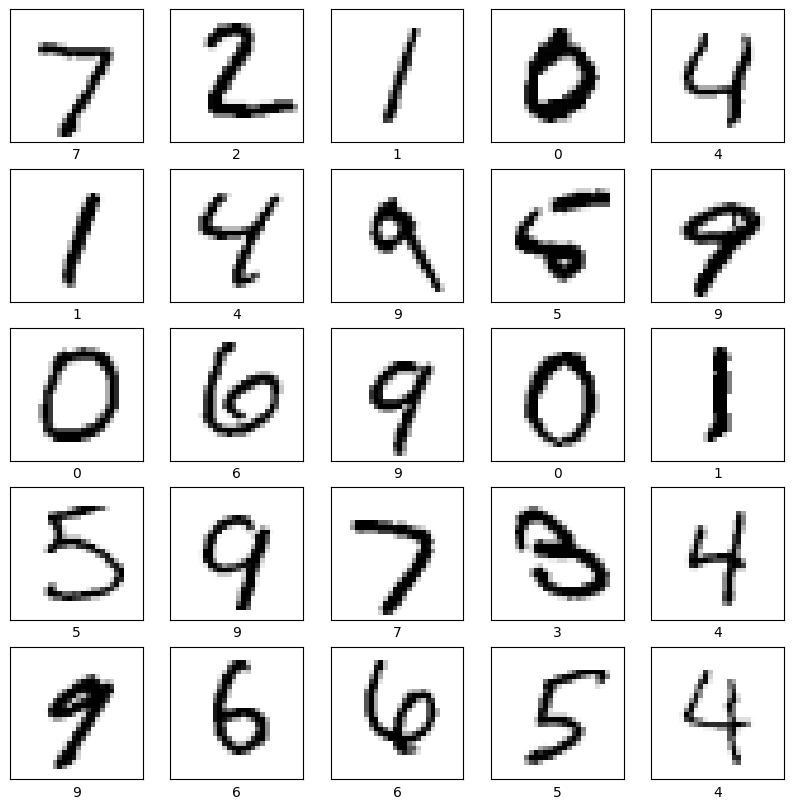

cnt_wrong: 244
predicted wrong 10: [149, 151, 217, 247, 321, 381, 445, 448, 449, 495]


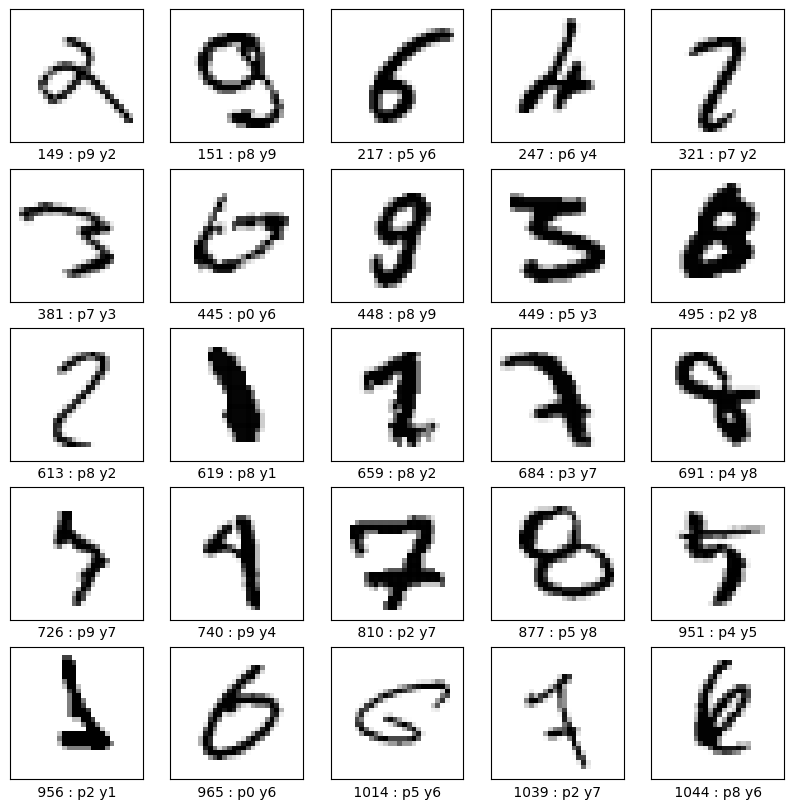

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train:%s y_train:%s x_test:%s y_test:%s "%(
    x_train.shape, y_train.shape, x_test.shape, y_test.shape))

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[0])
plt.show()

for y in range(28):
  for x in range(28):
      print("%4s"%x_train[0][y][x], end='')
  print()

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()

x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = x_train.reshape(60000, 784), x_test.reshape(10000, 784)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

p_test = model.predict(x_test)
print('p_test[0] : ' , p_test[0])

import numpy as np

print('p_test[0]:', np.argmax(p_test[0]), 'y_test[0]:', y_test[0])

x_test = x_test.reshape(10000,28,28)

plt.figure()
plt.imshow(x_test[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(p_test[i]))
plt.show()

cnt_wrong = 0
p_wrong = []
for i in range(10000):
  if np.argmax(p_test[i]) != y_test[i]:
    p_wrong.append(i)
    cnt_wrong +=1

print('cnt_wrong:' , cnt_wrong)
print('predicted wrong 10:' , p_wrong[:10])

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[p_wrong[i]], cmap=plt.cm.binary)
  plt.xlabel(" %s : p%s y%s " %(
      p_wrong[i], np.argmax(p_test[p_wrong[i]]), y_test[p_wrong[i]]))
plt.show()



